In [1]:
%config IPCompleter.greedy=True
import findspark
findspark.init()
from pyspark import SparkConf
from pyspark import SparkContext
from pyspark.sql.functions import col
import matplotlib.pyplot as plt
import os

In [2]:
conf=SparkConf().setMaster("local[*]").setAppName("MovieRecommendationApp")
sc = SparkContext.getOrCreate(conf=conf) 

In [3]:
# Check file location
main_data_name = "data_5m.txt"
if not os.path.exists(main_data_name):
    # Create a list of files
    file_list = ["combined_data_5000000.txt"]

    # Create a list to store the aggregated rows
    collected_rows = []

    # Process each file
    for file_name in file_list:
        # Read file
        with open(file_name, "r") as file:
            rows = file.readlines()

        # Process rows
        current_section = None
        for row in rows:
            if row.strip().endswith(":"):
                current_section = row.strip()[:-1]
            else:
                collected_rows.append(f"{current_section},{row.strip()}")

    # Write the summed lines to the sum file
    with open(main_data_name, "w") as main_file:
        for row in collected_rows:
            main_file.write(row + "\n")

In [4]:
from pyspark.sql import SparkSession
# Create a SparkSession\n",
spark = SparkSession.builder.getOrCreate()

# Read the CSV file into a DataFrame",
df = spark.read.csv("data_10m.txt", header=False, inferSchema=True)

In [5]:
df.show()

+---+-------+---+-------------------+
|_c0|    _c1|_c2|                _c3|
+---+-------+---+-------------------+
|  1|1488844|  3|2005-09-06 00:00:00|
|  1| 822109|  5|2005-05-13 00:00:00|
|  1| 885013|  4|2005-10-19 00:00:00|
|  1|  30878|  4|2005-12-26 00:00:00|
|  1| 823519|  3|2004-05-03 00:00:00|
|  1| 893988|  3|2005-11-17 00:00:00|
|  1| 124105|  4|2004-08-05 00:00:00|
|  1|1248029|  3|2004-04-22 00:00:00|
|  1|1842128|  4|2004-05-09 00:00:00|
|  1|2238063|  3|2005-05-11 00:00:00|
|  1|1503895|  4|2005-05-19 00:00:00|
|  1|2207774|  5|2005-06-06 00:00:00|
|  1|2590061|  3|2004-08-12 00:00:00|
|  1|   2442|  3|2004-04-14 00:00:00|
|  1| 543865|  4|2004-05-28 00:00:00|
|  1|1209119|  4|2004-03-23 00:00:00|
|  1| 804919|  4|2004-06-10 00:00:00|
|  1|1086807|  3|2004-12-28 00:00:00|
|  1|1711859|  4|2005-05-08 00:00:00|
|  1| 372233|  5|2005-11-23 00:00:00|
+---+-------+---+-------------------+
only showing top 20 rows



In [6]:
# Specify column names
column_names = ["movieID", "userID", "rating", "date"]

# Rename columns
for i in range(len(column_names)):
    df = df.withColumnRenamed("_c" + str(i), column_names[i])

In [7]:
df.show()

+-------+-------+------+-------------------+
|movieID| userID|rating|               date|
+-------+-------+------+-------------------+
|      1|1488844|     3|2005-09-06 00:00:00|
|      1| 822109|     5|2005-05-13 00:00:00|
|      1| 885013|     4|2005-10-19 00:00:00|
|      1|  30878|     4|2005-12-26 00:00:00|
|      1| 823519|     3|2004-05-03 00:00:00|
|      1| 893988|     3|2005-11-17 00:00:00|
|      1| 124105|     4|2004-08-05 00:00:00|
|      1|1248029|     3|2004-04-22 00:00:00|
|      1|1842128|     4|2004-05-09 00:00:00|
|      1|2238063|     3|2005-05-11 00:00:00|
|      1|1503895|     4|2005-05-19 00:00:00|
|      1|2207774|     5|2005-06-06 00:00:00|
|      1|2590061|     3|2004-08-12 00:00:00|
|      1|   2442|     3|2004-04-14 00:00:00|
|      1| 543865|     4|2004-05-28 00:00:00|
|      1|1209119|     4|2004-03-23 00:00:00|
|      1| 804919|     4|2004-06-10 00:00:00|
|      1|1086807|     3|2004-12-28 00:00:00|
|      1|1711859|     4|2005-05-08 00:00:00|
|      1| 

In [8]:
df.count()

4999004

In [9]:
df = df.select("movieID", "userID", "rating")

In [10]:
df.show()

+-------+-------+------+
|movieID| userID|rating|
+-------+-------+------+
|      1|1488844|     3|
|      1| 822109|     5|
|      1| 885013|     4|
|      1|  30878|     4|
|      1| 823519|     3|
|      1| 893988|     3|
|      1| 124105|     4|
|      1|1248029|     3|
|      1|1842128|     4|
|      1|2238063|     3|
|      1|1503895|     4|
|      1|2207774|     5|
|      1|2590061|     3|
|      1|   2442|     3|
|      1| 543865|     4|
|      1|1209119|     4|
|      1| 804919|     4|
|      1|1086807|     3|
|      1|1711859|     4|
|      1| 372233|     5|
+-------+-------+------+
only showing top 20 rows



In [11]:
print("Number of sample: ",df.count())
print("Number of unique movies : ",df.select("movieID").distinct().count())
print("Number of unique user : ",df.select("userID").distinct().count())

Number of sample:  4999004
Number of unique movies :  996
Number of unique user :  404468


In [12]:
df.groupBy("rating").count().show()

+------+-------+
|rating|  count|
+------+-------+
|     1| 220316|
|     3|1429533|
|     5|1131031|
|     4|1729934|
|     2| 488190|
+------+-------+



In [13]:
rating_distribution = df.groupBy("rating").count()

In [14]:
# Get the total number of ratings
total_rating_number = rating_distribution.agg({"count": "sum"}).collect()[0]["sum(count)"]

# Calculate percentile values
rating_distribution = rating_distribution.withColumn("percent", rating_distribution["count"] / total_rating_number * 100)

# Collect data for pie chart
pie_data = rating_distribution.select("rating", "percent").collect()

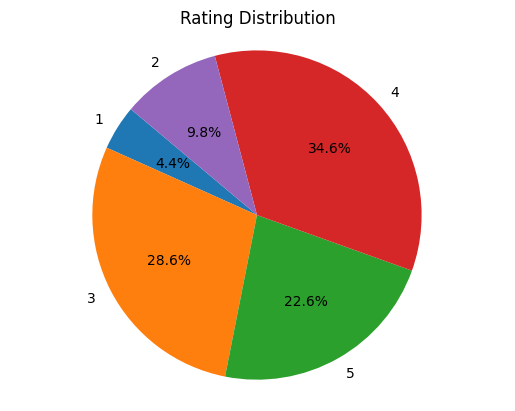

In [15]:
# Draw a pie chart
labels = [str(row["rating"]) for row in pie_data]
sizes = [row["percent"] for row in pie_data]

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Makes the circle round
plt.title('Rating Distribution')
plt.show()

In [16]:
df.select("rating").rdd.map(lambda x: x[0]).stats()

(count: 4999004, mean: 3.6127568611667495, stdev: 1.0721637982716874, max: 5.0, min: 1.0)

In [71]:
movie_df = spark.read.csv("movie_titles.csv", header=False, inferSchema=True)

In [72]:
movie_df.show()

+---+----+--------------------+
|_c0| _c1|                 _c2|
+---+----+--------------------+
|  1|2003|     Dinosaur Planet|
|  2|2004|Isle of Man TT 20...|
|  3|1997|           Character|
|  4|1994|Paula Abdul's Get...|
|  5|2004|The Rise and Fall...|
|  6|1997|                Sick|
|  7|1992|               8 Man|
|  8|2004|What the #$*! Do ...|
|  9|1991|Class of Nuke 'Em...|
| 10|2001|             Fighter|
| 11|1999|Full Frame: Docum...|
| 12|1947|My Favorite Brunette|
| 13|2003|Lord of the Rings...|
| 14|1982|  Nature: Antarctica|
| 15|1988|Neil Diamond: Gre...|
| 16|1996|           Screamers|
| 17|2005|           7 Seconds|
| 18|1994|    Immortal Beloved|
| 19|2000|By Dawn's Early L...|
| 20|1972|     Seeta Aur Geeta|
+---+----+--------------------+
only showing top 20 rows



In [73]:
# Set column names
column_names = ["movieID", "release_year", "title"]

# Rename columns
for i in range(len(column_names)):
    movie_df = movie_df.withColumnRenamed("_c" + str(i), column_names[i])

In [74]:
movie_df.show()

+-------+------------+--------------------+
|movieID|release_year|               title|
+-------+------------+--------------------+
|      1|        2003|     Dinosaur Planet|
|      2|        2004|Isle of Man TT 20...|
|      3|        1997|           Character|
|      4|        1994|Paula Abdul's Get...|
|      5|        2004|The Rise and Fall...|
|      6|        1997|                Sick|
|      7|        1992|               8 Man|
|      8|        2004|What the #$*! Do ...|
|      9|        1991|Class of Nuke 'Em...|
|     10|        2001|             Fighter|
|     11|        1999|Full Frame: Docum...|
|     12|        1947|My Favorite Brunette|
|     13|        2003|Lord of the Rings...|
|     14|        1982|  Nature: Antarctica|
|     15|        1988|Neil Diamond: Gre...|
|     16|        1996|           Screamers|
|     17|        2005|           7 Seconds|
|     18|        1994|    Immortal Beloved|
|     19|        2000|By Dawn's Early L...|
|     20|        1972|     Seeta

In [75]:
main_data = df.join(movie_df, on="movieID", how="inner")

In [76]:
main_data.show()

+-------+-------+------+------------+---------------+
|movieID| userID|rating|release_year|          title|
+-------+-------+------+------------+---------------+
|      1|1488844|     3|        2003|Dinosaur Planet|
|      1| 822109|     5|        2003|Dinosaur Planet|
|      1| 885013|     4|        2003|Dinosaur Planet|
|      1|  30878|     4|        2003|Dinosaur Planet|
|      1| 823519|     3|        2003|Dinosaur Planet|
|      1| 893988|     3|        2003|Dinosaur Planet|
|      1| 124105|     4|        2003|Dinosaur Planet|
|      1|1248029|     3|        2003|Dinosaur Planet|
|      1|1842128|     4|        2003|Dinosaur Planet|
|      1|2238063|     3|        2003|Dinosaur Planet|
|      1|1503895|     4|        2003|Dinosaur Planet|
|      1|2207774|     5|        2003|Dinosaur Planet|
|      1|2590061|     3|        2003|Dinosaur Planet|
|      1|   2442|     3|        2003|Dinosaur Planet|
|      1| 543865|     4|        2003|Dinosaur Planet|
|      1|1209119|     4|    

In [77]:
main_data.printSchema()

root
 |-- movieID: integer (nullable = true)
 |-- userID: integer (nullable = true)
 |-- rating: integer (nullable = true)
 |-- release_year: integer (nullable = true)
 |-- title: string (nullable = true)



In [78]:
main_data = main_data.withColumn("release_year", col("release_year").cast("integer"))

# Print the schema of the DataFrame
main_data.printSchema()

root
 |-- movieID: integer (nullable = true)
 |-- userID: integer (nullable = true)
 |-- rating: integer (nullable = true)
 |-- release_year: integer (nullable = true)
 |-- title: string (nullable = true)



In [79]:
main_data.count()

4999004

In [80]:
# Find the number of null values for each column
null_values = {column: main_data.where(col(column).isNull()).count() for column in main_data.columns}

# Calculate the total number of null values
total_null_value_number = sum(null_values.values())

# Print the result to the screen
print("Total number of null values:", total_null_value_number)
print("Number of null values by column")
for column, null_number in null_values.items():
    print(f"{column}: {null_number}")

Total number of null values: 0
Number of null values by column
movieID: 0
userID: 0
rating: 0
release_year: 0
title: 0


In [81]:
unique_years = main_data.select("release_year").rdd.map(lambda x: (x, 1)).reduceByKey(lambda x, y: x + y)
unique_years_count = unique_years.count()

print("The release_year column has", unique_years_count ,"different values.")

The release_year column has 76 different values.


In [82]:
movie_df.printSchema()

root
 |-- movieID: integer (nullable = true)
 |-- release_year: integer (nullable = true)
 |-- title: string (nullable = true)



In [83]:
movie_df = movie_df.withColumn("release_year", col("release_year").cast("integer"))

# Print the schema of the DataFrame
movie_df.printSchema()

root
 |-- movieID: integer (nullable = true)
 |-- release_year: integer (nullable = true)
 |-- title: string (nullable = true)



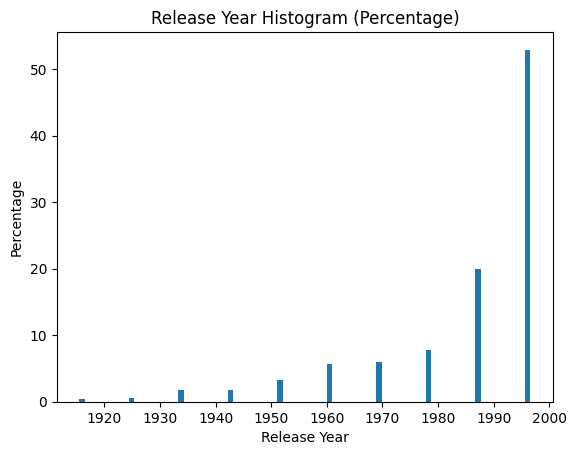

In [84]:
# convert release_year column to RDD
release_years_rdd = movie_df.select("release_year").rdd.flatMap(lambda x: x)

# Create histogram
histogram = release_years_rdd.histogram(10) 

# Extract histogram data
bins = histogram[0]
frequencies = histogram[1]

# Get the total number of data
total_count = release_years_rdd.count()

# Calculate frequencies in percent
percentage_frequencies = [count / total_count * 100 for count in frequencies]

plt.bar(bins[:-1], percentage_frequencies, width=1.0)
plt.xlabel("Release Year")
plt.ylabel("Percentage")
plt.title("Release Year Histogram (Percentage)")
plt.show()

In [85]:
# Filter rows with null values
filtered_df = main_data.filter(col("release_year").isNotNull())

# Get statistics on filtered DataFrame
filtered_df.select("release_year").rdd.flatMap(lambda x: x).stats()

(count: 4999004, mean: 1994.776860750664, stdev: 12.505741465136412, max: 2005.0, min: 1916.0)

In [32]:
# take rating and title columns and convert them to RDD
rdd = main_data.select("rating", "title").rdd.map(lambda x: (x[1], x[0]))

# Finding the movies with the highest average vote
top_10_high_avg_rating = rdd.mapValues(lambda x: (x, 1)) \
    .reduceByKey(lambda x, y: (x[0] + y[0], x[1] + y[1])) \
    .mapValues(lambda x: x[0] / x[1]) \
    .takeOrdered(10, key=lambda x: -x[1])

print("\nTop 10 Movies with Highest Average Rating:")
for title, avg_rating in top_10_high_avg_rating:
    print(f"{title}: {avg_rating}")


Top 10 Movies with Highest Average Rating:
Lord of the Rings: The Return of the King: Extended Edition: Bonus Material: 4.552
Yu Yu Hakusho: 4.40801308258381
Futurama: Monster Robot Maniac Fun Collection: 4.301984126984127
Sex and the City: Season 4: 4.289368944031183
Star Trek: The Next Generation: Season 7: 4.254008536163341
Elfen Lied: 4.2518796992481205
Foyle's War: Set 2: 4.249292929292929
Read Or Die: 4.24793388429752
Chappelle's Show: Season 1: 4.2111917098445595
Seven Samurai: 4.199615032659114


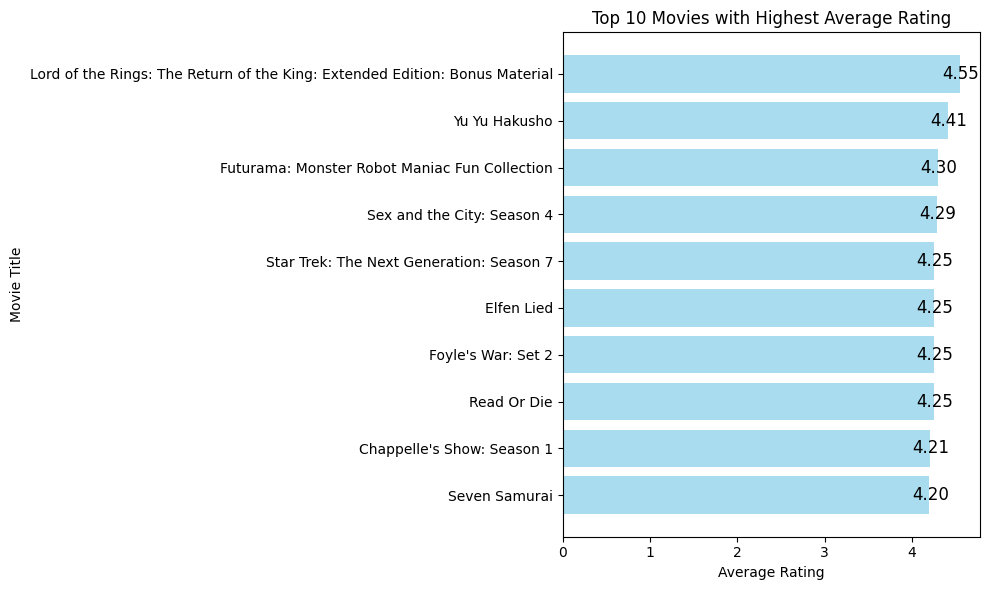

In [33]:
# Separate the top 10 movies and their average scores from the charts
titles = [movie[0] for movie in top_10_high_avg_rating]
avg_ratings = [movie[1] for movie in top_10_high_avg_rating]

plt.figure(figsize=(10, 6))

# Use 'annotation' to show the average score of each movie above the bar
plt.barh(titles, avg_ratings, color='skyblue', alpha=0.7)
for i, v in enumerate(avg_ratings):
    plt.text(v + 0.01, i, f"{v:.2f}", ha='center', va='center', fontsize=12)

plt.xlabel('Average Rating')
plt.ylabel('Movie Title')
plt.title('Top 10 Movies with Highest Average Rating')
plt.gca().invert_yaxis()  # Sort movies by score (from highest to lowest)
plt.tight_layout()

plt.show()

In [34]:
# Finding movies with the lowest average vote
top_10_low_avg_rating = rdd.mapValues(lambda x: (x, 1)) \
    .reduceByKey(lambda x, y: (x[0] + y[0], x[1] + y[1])) \
    .mapValues(lambda x: x[0] / x[1]) \
    .takeOrdered(10, key=lambda x: x[1])

print("\nTop 10 Movies with Lowest Average Rating:")
for title, avg_rating in top_10_low_avg_rating:
    print(f"{title}: {avg_rating}")


Top 10 Movies with Lowest Average Rating:
Avia Vampire Hunter: 1.2878787878787878
Underground Comedy Movie: 1.50503355704698
Horror Vision: 1.6344086021505377
The Bonesetter: 1.6754385964912282
Dark Town: 1.7211538461538463
Reign in Darkness: 1.7619047619047619
The Blackout: 1.8830409356725146
Nine Lives: 1.9161490683229814
Sleepover Nightmare: 1.9545454545454546
Iron Monkey 2: 1.9545454545454546


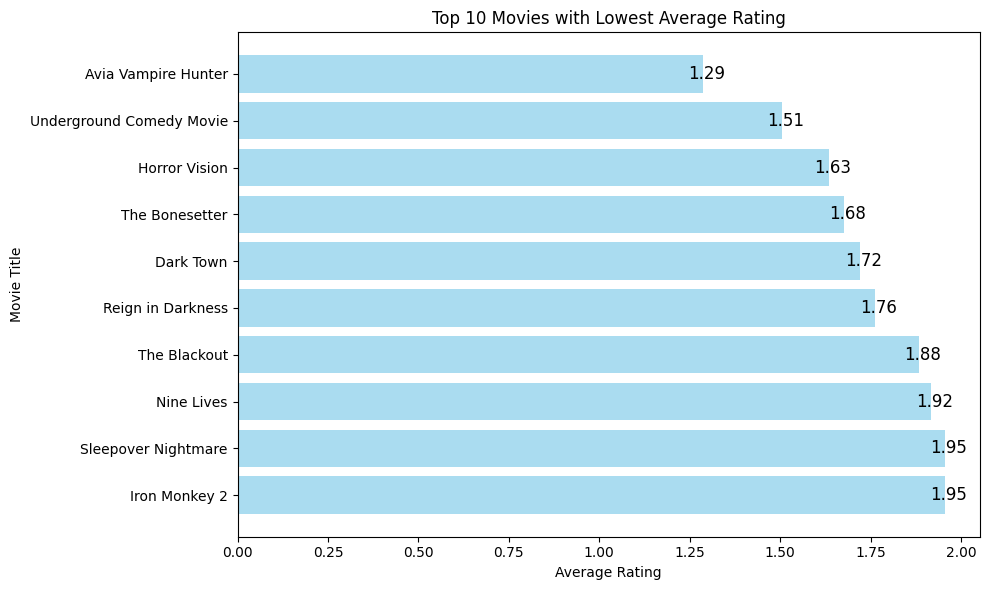

In [35]:
# Separate the top 10 movies and their average scores from the charts
titles = [movie[0] for movie in top_10_low_avg_rating]
avg_ratings = [movie[1] for movie in top_10_low_avg_rating]

plt.figure(figsize=(10, 6))

# Use 'annotation' to show the average score of each movie above the bar
plt.barh(titles, avg_ratings, color='skyblue', alpha=0.7)
for i, v in enumerate(avg_ratings):
    plt.text(v + 0.01, i, f"{v:.2f}", ha='center', va='center', fontsize=12)

plt.xlabel('Average Rating')
plt.ylabel('Movie Title')
plt.title('Top 10 Movies with Lowest Average Rating')
plt.gca().invert_yaxis()  # Sort movies by score (from highest to lowest)
plt.tight_layout()

plt.show()

In [36]:
title_counts = main_data.rdd \
    .map(lambda row: (row.title, 1)) \
    .reduceByKey(lambda x, y: x + y) \
    .sortBy(lambda x: x[1], ascending=False) \
    .take(10)

# Get the total number of rows
total_rows = main_data.count()

# Calculate and print the ratio of each movie
for title, count in title_counts:
    percentage = round((count / total_rows) * 100, 2)
    print(f"{title}: {count} ({percentage}%)")

American Beauty: 154832 (3.1%)
Something's Gotta Give: 118413 (2.37%)
Kill Bill: Vol. 2: 116762 (2.34%)
Ray: 108606 (2.17%)
Mean Girls: 104362 (2.09%)
Speed: 100248 (2.01%)
Pay It Forward: 99812 (2.0%)
X2: X-Men United: 98720 (1.97%)
Reservoir Dogs: 90450 (1.81%)
Rush Hour 2: 90010 (1.8%)


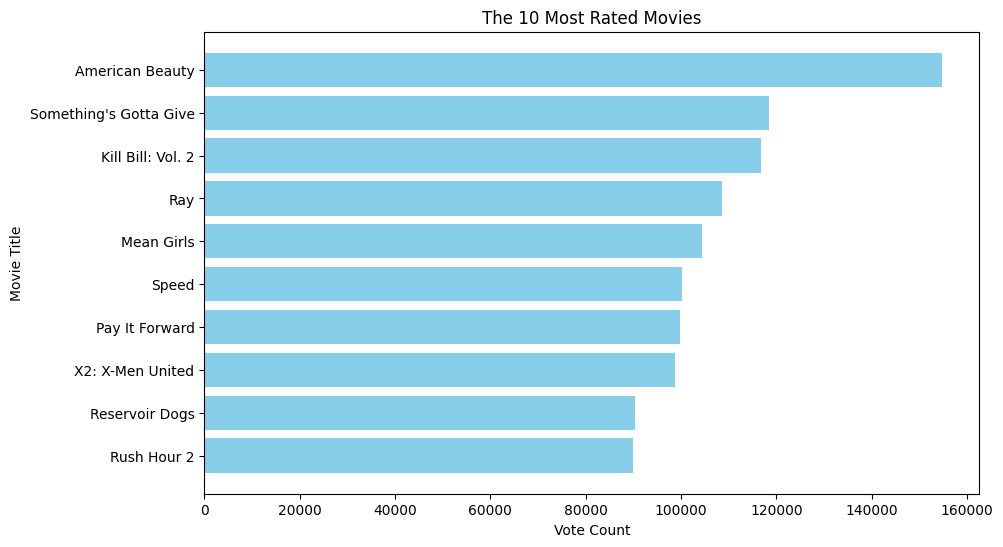

In [37]:
# Parse data
titles, counts = zip(*title_counts)

# Plot bar plot
plt.figure(figsize=(10, 6))
plt.barh(titles, counts, color='skyblue')
plt.xlabel('Vote Count')
plt.ylabel('Movie Title')
plt.title('The 10 Most Rated Movies')
plt.gca().invert_yaxis()
plt.show()

In [38]:
title_counts = main_data.rdd \
    .map(lambda row: (row.title, 1)) \
    .reduceByKey(lambda x, y: x + y) \
    .sortBy(lambda x: x[1], ascending=True) \
    .take(10)

# Get the total number of rows
total_rows = main_data.count()

# Calculate and print the ratio of each movie
for title, count in title_counts:
    percentage = round((count / total_rows) * 100, 2)
    print(f"{title}: {count} ({percentage}%)")

Haven: 43 (0.0%)
Predator Island: 45 (0.0%)
Danielle Steel's Heartbeat: 60 (0.0%)
The Edward R. Murrow Collection: 62 (0.0%)
Female Yakuza Tale: 62 (0.0%)
The Lickerish Quartet: 68 (0.0%)
Gloria Estefan: Don't Stop!: 69 (0.0%)
Rage at Dawn: 72 (0.0%)
Whisper Kill: 76 (0.0%)
Sam the Iron Bridge: 78 (0.0%)


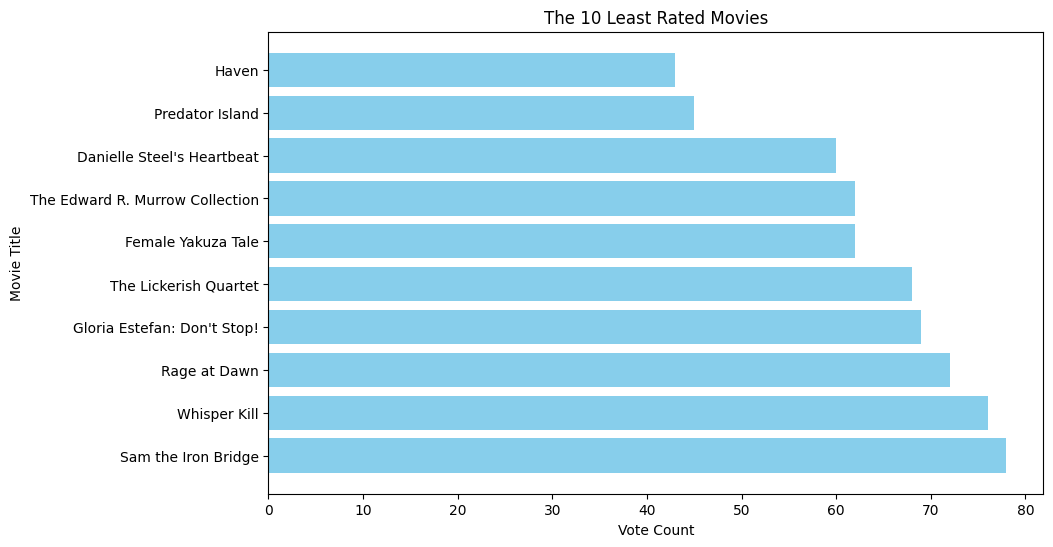

In [39]:
# Parse data
titles, counts = zip(*title_counts)

# Plot bar plot
plt.figure(figsize=(10, 6))
plt.barh(titles, counts, color='skyblue')
plt.xlabel('Vote Count')
plt.ylabel('Movie Title')
plt.title('The 10 Least Rated Movies')
plt.gca().invert_yaxis()
plt.show()

In [40]:
# Group and count users by number of votes
user_ratings_count = main_data.rdd \
    .map(lambda x: (x["userID"], 1)) \
    .reduceByKey(lambda a, b: a + b) \
    .sortBy(lambda x: x[1], ascending=False) \
    .take(10)

print("\nTop 10 Most Frequent Voters:")
for userID, vote_count in user_ratings_count:
    print(f"{userID}: {vote_count}")


Top 10 Most Frequent Voters:
305344: 988
387418: 980
2439493: 931
1664010: 893
2118461: 832
1314869: 546
1461435: 533
1639792: 527
1932594: 504
2606799: 486


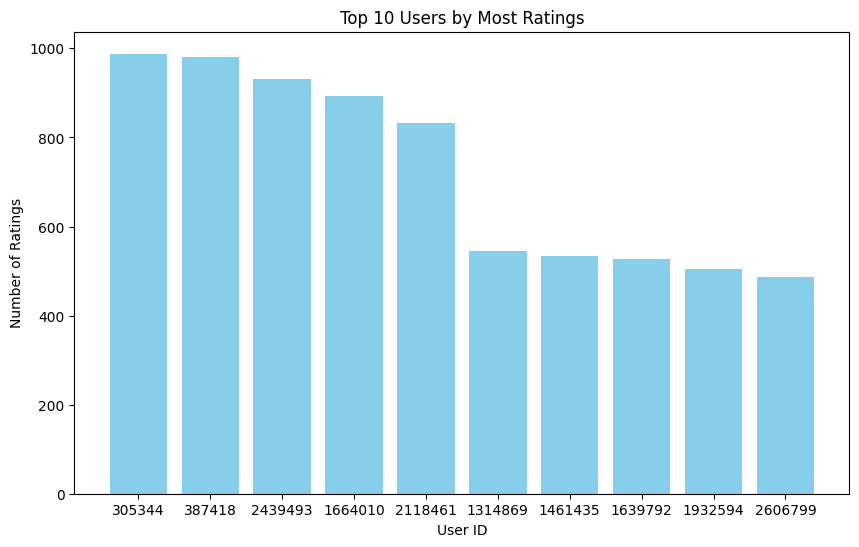

In [41]:
# Parse data for chart
user_ids = [str(x[0]) for x in user_ratings_count]
ratings_counts = [x[1] for x in user_ratings_count]

# Creating a graph
plt.figure(figsize=(10, 6))
plt.bar(user_ids, ratings_counts, color='skyblue')
plt.xlabel('User ID')
plt.ylabel('Number of Ratings')
plt.title('Top 10 Users by Most Ratings')
plt.xticks(user_ids)
plt.show()

In [42]:
(training_data, testing_data) = main_data.randomSplit([0.7, 0.3])

In [42]:
from pyspark.mllib.recommendation import Rating

ratings_rdd = main_data.rdd.map(lambda row: Rating(int(row["userID"]), int(row["movieID"]), float(row["rating"])))

In [44]:
ratings = ratings_rdd.take(10)

In [49]:
import numpy as np
from pyspark.mllib.recommendation import ALS
from pyspark.mllib.evaluation import RegressionMetrics

# Define parameters
ranks = [25, 15, 5]
iterations = [20, 10, 5]
lambdas = [0.1, 0.01]
seed = 5069
blocks = 10

# Create empty lists to store RMSE and MSE values
rmse_values = []
mse_values = []

# Train ALS model for each combination
for rank in ranks:
    for iteration in iterations:
        for lambda_ in lambdas:
            # Modeli eğit
            model = ALS.train(ratings_rdd, rank=rank, iterations=iteration, lambda_=lambda_, seed=seed, blocks=blocks)
            
            # Combine predictions and actual values
            predictions = model.predictAll(ratings_rdd.map(lambda x: (x[0], x[1]))).map(lambda x: ((x[0], x[1]), x[2]))
            rates_and_preds = ratings_rdd.map(lambda x: ((x[0], x[1]), x[2])).join(predictions)
            
            # Calculate RMSE and MSE values
            metrics = RegressionMetrics(rates_and_preds.map(lambda x: x[1]))
            rmse = metrics.rootMeanSquaredError
            mse = metrics.meanSquaredError
            
            # RMSE ve MSE değerlerini listeye ekle
            rmse_values.append((rank, iteration, lambda_, rmse))
            mse_values.append((rank, iteration, lambda_, mse))

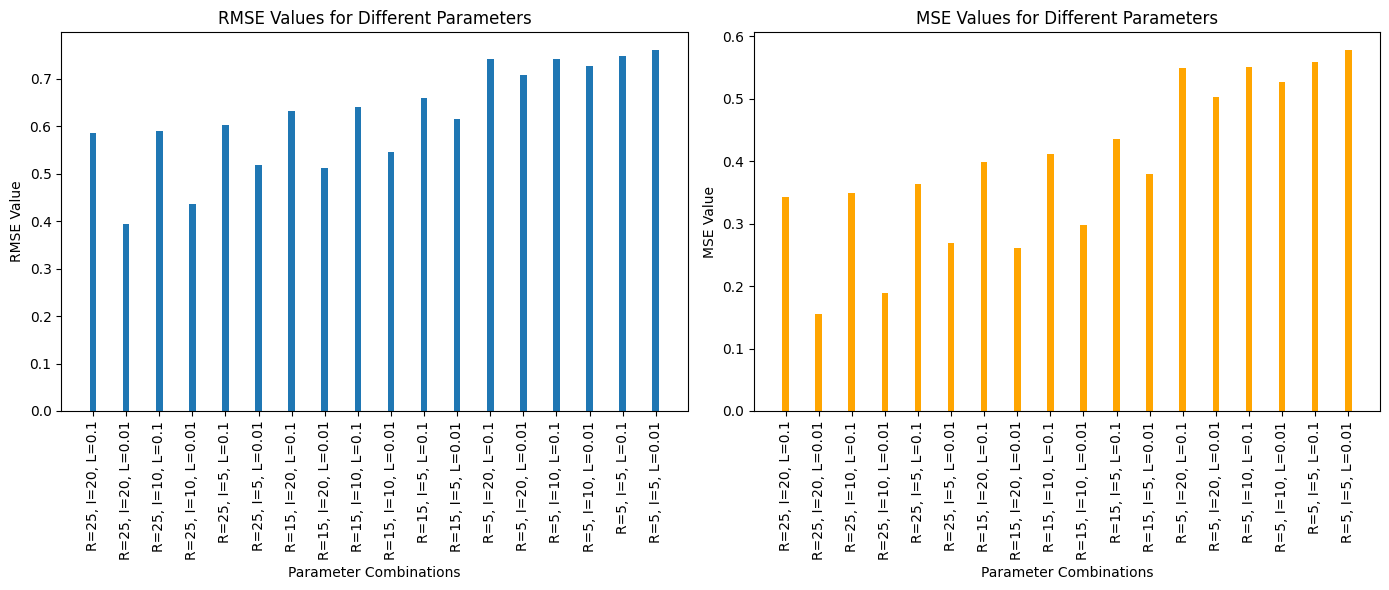

In [65]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert RMSE and MSE values to DataFrame
rmse_df = pd.DataFrame(rmse_values, columns=['rank', 'iteration', 'lambda', 'rmse'])
mse_df = pd.DataFrame(mse_values, columns=['rank', 'iteration', 'lambda', 'mse'])

# Width setting for bar plot
bar_width = 0.2

# Create a chart
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# RMSE bar plot
rmse_positions = np.arange(len(rmse_df))
axs[0].bar(rmse_positions, rmse_df['rmse'], bar_width, label='RMSE')
axs[0].set_xticks(rmse_positions)
axs[0].set_xticklabels([f"R={r}, I={i}, L={l}" for r, i, l in zip(rmse_df['rank'], rmse_df['iteration'], rmse_df['lambda'])], rotation=90)
axs[0].set_xlabel('Parameter Combinations')
axs[0].set_ylabel('RMSE Value')
axs[0].set_title('RMSE Values for Different Parameters')

# MSE bar plot
mse_positions = np.arange(len(mse_df))
axs[1].bar(mse_positions, mse_df['mse'], bar_width, label='MSE', color='orange')
axs[1].set_xticks(mse_positions)
axs[1].set_xticklabels([f"R={r}, I={i}, L={l}" for r, i, l in zip(mse_df['rank'], mse_df['iteration'], mse_df['lambda'])], rotation=90)
axs[1].set_xlabel('Parameter Combinations')
axs[1].set_ylabel('MSE Value')
axs[1].set_title('MSE Values for Different Parameters')

plt.tight_layout()
plt.show()

In [60]:
merged_df = pd.merge(rmse_df, mse_df, on=['rank', 'iteration', 'lambda'])

# Print the combined DataFrame to the screen
print("Combined RMSE and MSE Values:\n")
print(merged_df)

Combined RMSE and MSE Values:

    rank  iteration  lambda  rmse    mse 
0    25      20      0.1000 0.5859 0.3433
1    25      20      0.0100 0.3939 0.1551
2    25      10      0.1000 0.5900 0.3481
3    25      10      0.0100 0.4351 0.1893
4    25       5      0.1000 0.6024 0.3629
5    25       5      0.0100 0.5181 0.2684
6    15      20      0.1000 0.6318 0.3991
7    15      20      0.0100 0.5110 0.2611
8    15      10      0.1000 0.6408 0.4106
9    15      10      0.0100 0.5463 0.2984
10   15       5      0.1000 0.6604 0.4361
11   15       5      0.0100 0.6161 0.3796
12    5      20      0.1000 0.7415 0.5498
13    5      20      0.0100 0.7089 0.5025
14    5      10      0.1000 0.7418 0.5503
15    5      10      0.0100 0.7259 0.5269
16    5       5      0.1000 0.7473 0.5585
17    5       5      0.0100 0.7598 0.5773


In [61]:
model = ALS.train(ratings_rdd, rank=25, iterations=20, lambda_=0.01, seed=5069, blocks=10)

In [62]:
# Get 10 movie recommendations for a specific user
user_id = 1314869
top_K = 10
recommendations = model.recommendProducts(user_id, top_K)

# Print Recommendations
print("Recommended movies:")
for recommendation in recommendations:
    movieTitle = movie_df.filter(movie_df.movieID == recommendation.product).select("title").collect()[0]["title"]
    print(f"Movie ID: {recommendation.product} | Movie Title: {movieTitle} | Predicted Score: {recommendation.rating}")


Recommended movies:
Movie ID: 858 | Movie Title: Sports Illustrated Swimsuit Edition: 2002 | Predicted Score: 4.513698708252241
Movie ID: 263 | Movie Title: Dragon Ball: Tournament Saga | Predicted Score: 4.326832375142175
Movie ID: 700 | Movie Title: Todd McFarlane's Spawn | Predicted Score: 4.253942670696843
Movie ID: 674 | Movie Title: Hellbound: Hellraiser II | Predicted Score: 4.202757452131835
Movie ID: 520 | Movie Title: E's Otherwise | Predicted Score: 4.198891794934797
Movie ID: 819 | Movie Title: The Faculty | Predicted Score: 4.144625840957511
Movie ID: 811 | Movie Title: The Lawnmower Man | Predicted Score: 4.075986322684507
Movie ID: 823 | Movie Title: Sleepaway Camp II: Unhappy Campers | Predicted Score: 4.051717459358561
Movie ID: 853 | Movie Title: Dragonball: The Magic Begins | Predicted Score: 4.042399299676812
Movie ID: 724 | Movie Title: Yu Yu Hakusho | Predicted Score: 4.022852672705318


In [63]:
# Get 10 user recommendations for a specific movie
movie_id = 15
top_K = 10
recommendations = model.recommendUsers(movie_id, top_K)

movieTitle = movie_df.filter(movie_df.movieID == movie_id).select("title").collect()[0]["title"]

# Print Recommendations
print("Recommended users:")
for recommendation in recommendations:
    print(f"Movie: {movieTitle} | User ID: {recommendation.user} | Predicted Score: {recommendation.rating}")


Recommended users:
Movie: Neil Diamond: Greatest Hits Live | User ID: 2429762 | Predicted Score: 8.898115254427587
Movie: Neil Diamond: Greatest Hits Live | User ID: 353673 | Predicted Score: 8.174670938283107
Movie: Neil Diamond: Greatest Hits Live | User ID: 324547 | Predicted Score: 8.131545876894437
Movie: Neil Diamond: Greatest Hits Live | User ID: 2590163 | Predicted Score: 8.076285065749355
Movie: Neil Diamond: Greatest Hits Live | User ID: 2099013 | Predicted Score: 8.034514163786334
Movie: Neil Diamond: Greatest Hits Live | User ID: 2059486 | Predicted Score: 7.9838147629146
Movie: Neil Diamond: Greatest Hits Live | User ID: 803043 | Predicted Score: 7.952838212820218
Movie: Neil Diamond: Greatest Hits Live | User ID: 2224246 | Predicted Score: 7.928229814504395
Movie: Neil Diamond: Greatest Hits Live | User ID: 1234299 | Predicted Score: 7.872320846468636
Movie: Neil Diamond: Greatest Hits Live | User ID: 2131073 | Predicted Score: 7.831188716356923


In [98]:
# Extract the product factors
product_factors = model.productFeatures().collectAsMap()

# Function to compute cosine similarity
def cosine_similarity(v1, v2):
    dot_product = np.dot(v1, v2)
    norm_v1 = np.linalg.norm(v1)
    norm_v2 = np.linalg.norm(v2)
    return dot_product / (norm_v1 * norm_v2)

# Find the vector of movie X
movie_id = 15  # replace with the actual movie ID
movie_vector = product_factors[movie_id]

# Calculate cosine similarity with all movies
similarity_scores = {mov_id: cosine_similarity(movie_vector, vec) for mov_id, vec in product_factors.items()}

# Sort similarity scores in descending order
sorted_similarity_scores = sorted(similarity_scores.items(), key=lambda x: x[1], reverse=True)

top_K = 10
sorted_similarity_scores = sorted_similarity_scores[:top_K]

# Print movieID, title, and similarity percentage for each movie
for movie_id, similarity in sorted_similarity_scores:
    # Find the movie title corresponding to the movieID
    movie_title = movie_df.filter(movie_df['movieID'] == movie_id).select('title').collect()[0][0]
    print(f"MovieID: {movie_id} | Title: {movie_title} | Similarity: {similarity:.2%}")

MovieID: 15 | Title: Neil Diamond: Greatest Hits Live | Similarity: 100.00%
MovieID: 888 | Title: Discovering Australia | Similarity: 68.93%
MovieID: 724 | Title: Yu Yu Hakusho | Similarity: 68.12%
MovieID: 794 | Title: A Stranger Among Us | Similarity: 64.85%
MovieID: 516 | Title: Monsoon Wedding | Similarity: 59.98%
MovieID: 262 | Title: Herbie Rides Again | Similarity: 58.59%
MovieID: 232 | Title: Gross Anatomy | Similarity: 57.53%
MovieID: 327 | Title: Storefront Hitchcock | Similarity: 56.27%
MovieID: 688 | Title: The History Channel Presents: The Alamo | Similarity: 55.86%
MovieID: 612 | Title: Cloak and Dagger | Similarity: 55.29%


In [86]:
import socket

# Get hostname and IP address
hostname = socket.gethostname()
ip_address = socket.gethostbyname(hostname)

print(f"Hostname: {hostname}")
print(f"IP Address: {ip_address}")

Hostname: DESKTOP-RRPOT29
IP Address: 192.168.1.2
